Ref used for Bayesian LR::
https://cedar.buffalo.edu/~srihari/CSE574/Chap3/3.4-BayesianRegression.pdf

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm
from scipy.stats import multivariate_normal
import scipy.stats as stats

##### Synthetic Data generation

In [2]:
w_0 = -0.3
w_1 = 0.5
num_samples = 6

x = np.linspace(-1,1,num_samples)
y = w_0 + (w_1*x) 

# Addition of random noise
std_noise = 0.2
random_noise = np.random.normal(0,std_noise,num_samples)
y = y+random_noise

# Calculation of precision 
beta = (1/(std_noise**2))

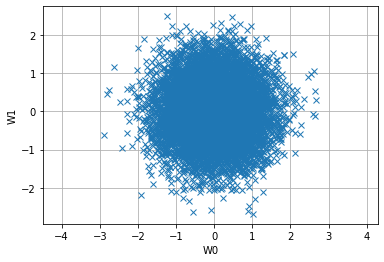

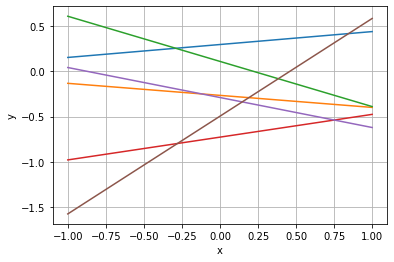

In [3]:
# for prior over distribution over theta, choose alpha
alpha = 2
wt_std = np.identity(2)/alpha
wt_mean = np.zeros(2)

w_0,w_1 = np.random.multivariate_normal(wt_mean, wt_std, 10000).T
plt.plot(w_0, w_1, 'x')
plt.grid()
plt.axis('equal')
plt.xlabel('W0')
plt.ylabel('W1')
plt.show()

# For random choice of weights
# Random sample from weights
w_0_rand = np.random.choice(w_0,6,False)
w_1_rand = np.random.choice(w_1,6,False)

y_rand = {}
for i in range(6):
    y_rand[i] = w_0_rand[i] + w_1_rand[i]*x[0:6]
    plt.plot(x[0:6],y_rand[i])
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Posterior Distribution

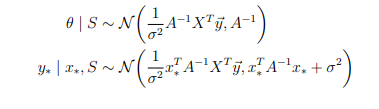



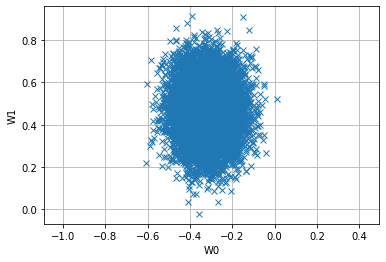

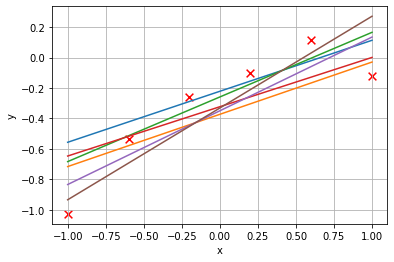

In [10]:
## Posterior distribution with condition on theta...

x_new = sm.add_constant(x)
x_dp = x_new[0]
y_dp = y[0]

A = (1/(std_noise**2))*np.dot(x_new.T,x_new) + np.identity(2)/alpha
A_inv = np.linalg.inv(A)

mu_theta = np.dot(A_inv,np.dot(x_new.T,y))/(std_noise**2)
sigma_theta = A_inv

sigma_pred = np.dot(x_dp.T,np.dot(A_inv,x_dp)) + (std_noise**2)
mu_pred = np.dot(x_dp.T,mu_theta)

w_0,w_1 = np.random.multivariate_normal(mu_theta, sigma_theta, 10000).T
plt.plot(w_0, w_1, 'x')
plt.grid()
plt.axis('equal')
plt.xlabel('W0')
plt.ylabel('W1')
plt.show()

# For random choice of weights
# Random sample from weights
w_0_rand = np.random.choice(w_0,6,False)
w_1_rand = np.random.choice(w_1,6,False)

y_rand = {}
for i in range(6):
    y_rand[i] = w_0_rand[i] + w_1_rand[i]*x
    plt.plot(x,y_rand[i])

plt.scatter(x_new[:,1],y,s=60,marker='x',c='r')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

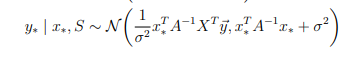

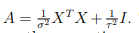

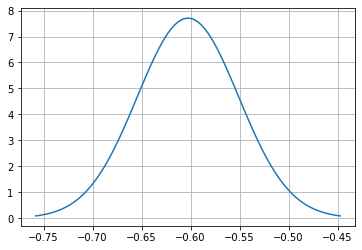

In [5]:
### Posterior distribution for a value of 'x', output is pred_val
x_dp = x_new[1]

sigma_pred = np.dot(x_dp.T,np.dot(A_inv,x_dp)) + (std_noise**2)
mu_pred = np.dot(x_dp.T,mu_theta)

pred_val = np.linspace(mu_pred - 3*sigma_pred, mu_pred + 3*sigma_pred, 100)
plt.plot(pred_val, stats.norm.pdf(pred_val, mu_pred, sigma_pred))
plt.grid()
plt.show()

In [6]:
print("Actual y-val",y[1])
print("Predicted value",mu_pred)

Actual y-val -0.5356953159875122
Predicted value -0.6026735713780204
